# Project description

Material Informatics is a very perspective field of knowledge. It allows to use machine learning technologies to obtain a new sense from a huge amount of gathered experimental data about mechanical properties of definite materials.

A determination of a dependency of material properties from a structure or a composition of a material is one of the core fundamental problems while new materials creation. This problem may be solved in the frame of Material Informatics with methods of machine learning. Given an experimental data about structure components and mechanical properties of existing (known) materials, one can build a ML-models to predict properties of some new material on the base of its structure.

We will consider "MatNavi Mechanical properties of low-alloy steels" dataset: https://www.kaggle.com/datasets/konghuanqing/matnavi-mechanical-properties-of-lowalloy-steels?resource=download
This dataset contains data about percentage of elements in a structure of definite low-alloy steels and some mechanical properties of these steels (proof stress, tensile strength, elongation, reduction in area).

The aim of this project is to build ML-model, which allows to predict proof stress, tensile strength, elongation, reduction in area of low-alloy steel with a given temperature and percentages of structural elements.
So we will build **multi-target regression model** in the frame of this project.

# 1. Imports and loading data

In [1]:
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from sklearn.model_selection import train_test_split

In [2]:
#url = 'https://raw.githubusercontent.com/ElenaNKn/ml-zoomcamp-solutions/master/capstone_project/mechanical_properties_low-alloy_steels.csv'
#filename = 'mechanical_properties_low-alloy_steels.csv'
#urllib.request.urlretrieve(url, filename)

In [3]:
df = pd.read_csv('mechanical_properties_low-alloy_steels.csv', header=0, sep=',')

In [4]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


# 2. Data handling and exploratory data analysis

## 2.1. Data preparation

In [5]:
# handle headers of a dataframe

df.columns = df.columns.str.lower().str.lstrip()
df.columns = df.columns.str.replace('+', 'and', regex=True).str.replace('°c', 'celcius', regex=True)
df.columns = df.columns.str.replace('0.2% ', '', regex=True).str.replace('%', 'perc', regex=True)
df.columns = df.columns.str.replace(' ', '_').str.replace('+', 'and', regex=True)
df.columns = df.columns.str.replace('(', '', regex=True).str.replace(')', '', regex=True)

In [6]:
df.head()

,alloy_code,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,ceq,nb_and_ta,temperature_celcius,proof_stress_mpa,tensile_strength_mpa,elongation_perc,reduction_in_area_perc
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [7]:
df.isnull().sum()   # checking for missing values

alloy_code                0
c                         0
si                        0
mn                        0
p                         0
s                         0
ni                        0
cr                        0
mo                        0
cu                        0
v                         0
al                        0
n                         0
ceq                       0
nb_and_ta                 0
temperature_celcius       0
proof_stress_mpa          0
tensile_strength_mpa      0
elongation_perc           0
reduction_in_area_perc    0
dtype: int64

In [8]:
df.dtypes    # checking types of columns

alloy_code                 object
c                         float64
si                        float64
mn                        float64
p                         float64
s                         float64
ni                        float64
cr                        float64
mo                        float64
cu                        float64
v                         float64
al                        float64
n                         float64
ceq                       float64
nb_and_ta                 float64
temperature_celcius         int64
proof_stress_mpa            int64
tensile_strength_mpa        int64
elongation_perc             int64
reduction_in_area_perc      int64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c,915.0,0.174929,0.059674,0.0900,0.1300,0.1600,0.200,0.3400
si,915.0,0.310918,0.086871,0.1800,0.2400,0.3000,0.370,0.5200
mn,915.0,0.812962,0.342775,0.4200,0.5000,0.6800,1.210,1.4800
p,915.0,0.014543,0.005244,0.0060,0.0100,0.0140,0.018,0.0300
s,915.0,0.010602,0.004024,0.0030,0.0080,0.0100,0.012,0.0220
ni,915.0,0.143016,0.172746,0.0000,0.0230,0.0500,0.210,0.6000
cr,915.0,0.427861,0.457568,0.0000,0.0400,0.1100,1.000,1.3100
mo,915.0,0.442870,0.394383,0.0050,0.0500,0.5000,0.560,1.3500
cu,915.0,0.079148,0.058481,0.0000,0.0400,0.0700,0.110,0.2500
v,915.0,0.060190,0.096403,0.0000,0.0000,0.0000,0.070,0.3000


Let's explore, what the content of dataframe columns is.

First columns are percentage of definite chemical elements in steels:
C - Carbon
Si - Silicon
Mn - Manganese
P - Phosphorus
S - Sulfur
Ni - Nickel
Cr - Chromium
Mo - Molybdenum
Cu - Copper
V - Vanadium
Al - Aluminum
N - Nitrogen
Nb - Niobium
Ta is likely an error name. The thing is that there is no element like "Ta" in the periodic table. But low-alloy steel may contain Titanium ("Ti") (https://www.matweb.com/search/datasheet_print.aspx?matguid=d1bdbccde4da4da4a9dbb8918d783b29).

Let's correct this error in a dataframe head

In [10]:
df.columns = df.columns.str.lower().str.replace('ta', 'ti')

Now let's explore, what "ceq" is.

As follows from https://www.kobelco-welding.jp/education-center/abc/ABC_2007-01.html "Ceq" is an coefficient which is called "Carbon equivalent". It assess the effect of composition while welding of low alloy steels. It is calculated by the formula 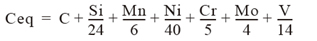

So "ceq" is calculated from other features of our dataset and we need to exclude it.

In [11]:
del df['ceq']

Now let's explore our dataset ones again 

In [12]:
df.head(n=22)

,alloy_code,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti,temperature_celcius,proof_stress_mpa,tensile_strength_mpa,elongation_perc,reduction_in_area_perc
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,400,316,489,26,79
5,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,450,287,461,25,81
6,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,500,274,431,28,85
7,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,550,262,387,32,87
8,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,600,220,314,42,88
9,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,650,152,226,59,92


The first column of our dataframe is an alloy code. So the first 10 rows of dataframe contains values of tensile stress for the first material (MBB) with different temperatures, the next 10 rows - for the second material and so on.

Alloy code is very important for engineering task, but in the ML model it brings no actual sence. It just makes sence for model that **material with given percentage of elements and temperature have this value of tensile strength**. That is why it's reasonably to exclude "alloy_code" column out of the dataframe.

In [13]:
del df['alloy_code']

The dataframe is ready to perform further analysis.

In [14]:
df

,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti,temperature_celcius,proof_stress_mpa,tensile_strength_mpa,elongation_perc,reduction_in_area_perc
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,27,342,490,30,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,100,338,454,27,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,200,337,465,23,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,300,346,495,21,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,400,316,489,26,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,350,268,632,28,65
911,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,400,244,575,28,68
912,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,450,224,500,29,72
913,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,500,209,428,30,78


## 2.2. Outliers handling

First we'll create a scatter plot matrix. It allows to visualize pair-wise relationship between different combinations of variables of the dataframe. And it can be also useful to find outliers

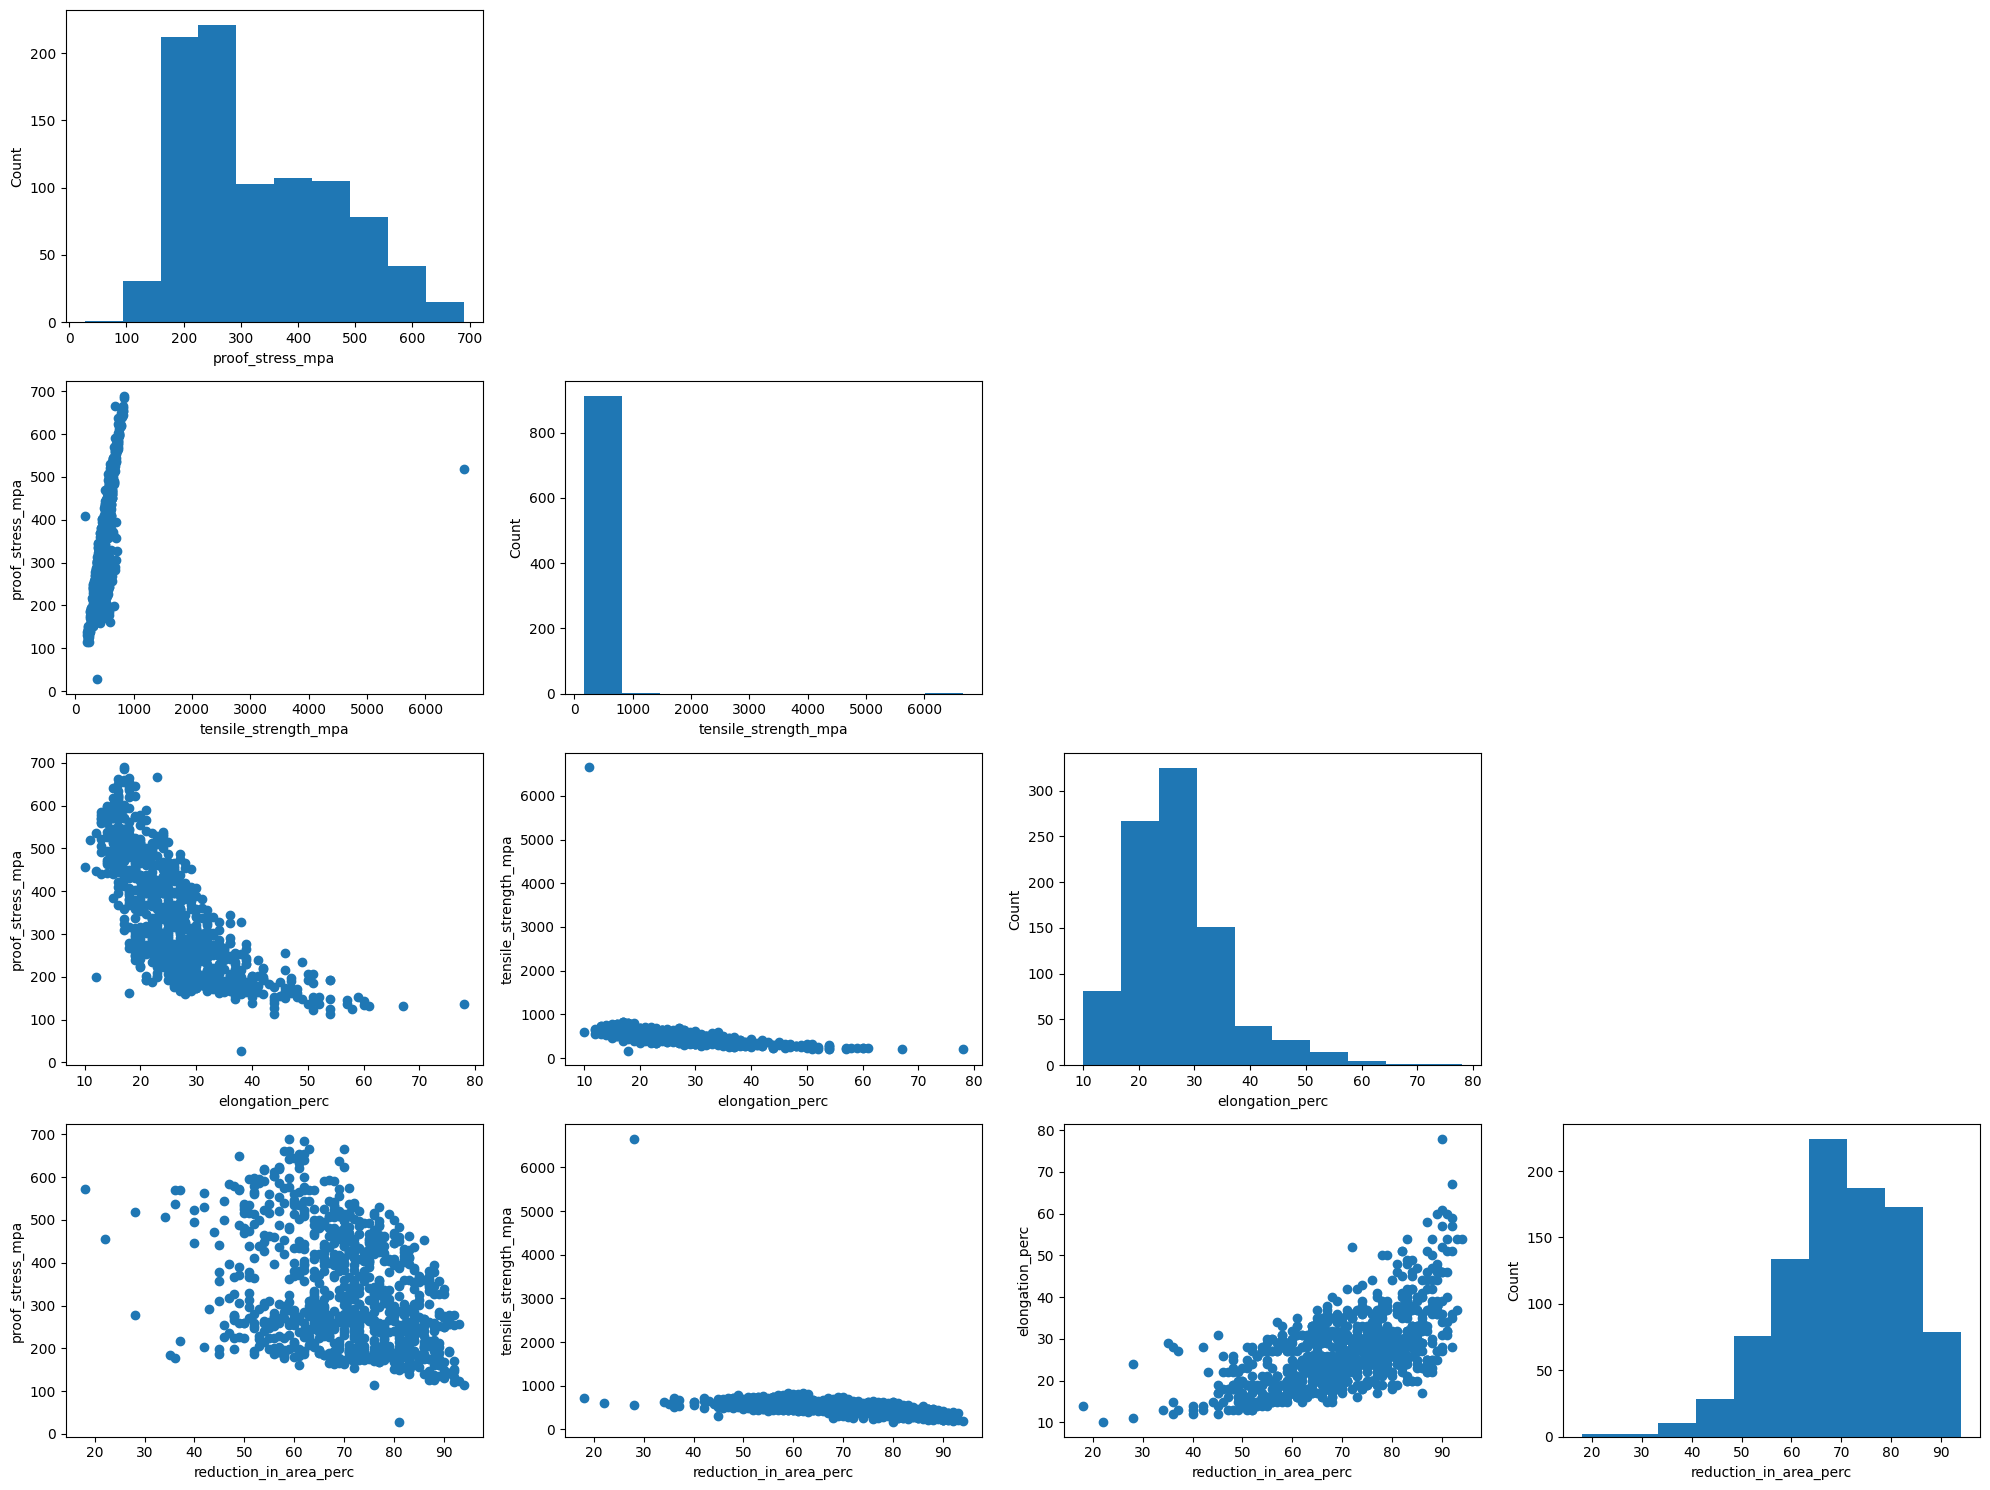

In [15]:
cols = ['proof_stress_mpa', 'tensile_strength_mpa', 'elongation_perc', 'reduction_in_area_perc']
scatterplotmatrix(df[cols].values, figsize=(20, 15), names=cols, alpha=1)
plt.tight_layout()
plt.show()

We see, that we fave a problem with tensile strength data. It look like it's conserned with some outlier or wrong data. Let's find out< how manu rows has tinsile strength value larger than 1000 MPa

In [16]:
tensile_strength_outlier = df[df['tensile_strength_mpa']>1000]
tensile_strength_outlier

,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti,temperature_celcius,proof_stress_mpa,tensile_strength_mpa,elongation_perc,reduction_in_area_perc
626,0.18,0.37,0.66,0.018,0.017,0.1,1.07,1.03,0.12,0.3,0.02,0.0081,0.0,300,519,6661,11,28


Now it's clear, that there is a mistake in a data in this row (it most likely that the value has an extra "6" number). As we have quite enoutght data to perform modeling, we will drop this row out. 

In [17]:
ind_dropped = tensile_strength_outlier.index
df.drop(ind_dropped, inplace=True)

## 2.3. Setting up the validation framework

In [18]:
# create list of feature columns names
list_features = [
    'c', 'si', 'mn', 'p', 's', 'ni', 'cr',
    'mo', 'cu', 'v', 'al', 'n',
    'nb_and_ti', 'temperature_celcius'
    ]

# create list of target columns names

list_targets = [
    'proof_stress_mpa', 'tensile_strength_mpa',
    'elongation_perc', 'reduction_in_area_perc'
    ]

In [19]:
# splitting into train - val - test datasets

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [20]:
len(df_train), len(df_val), len(df_test)

(548, 183, 183)

In [21]:
# create dataframes for feature variables

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
df_train_with_target = df_train.copy()  # store this matrix for correlation analysis

In [23]:
# create dataframes for target variables

dy_train = df_train[list_targets]
dy_val = df_val[list_targets]
dy_test = df_test[list_targets]

df_train.drop(list_targets, axis=1, inplace=True)
df_val.drop(list_targets, axis=1, inplace=True)
df_test.drop(list_targets, axis=1, inplace=True)

## 2.4. Dependency exploration

Let's build the scatter plot matrix for train data

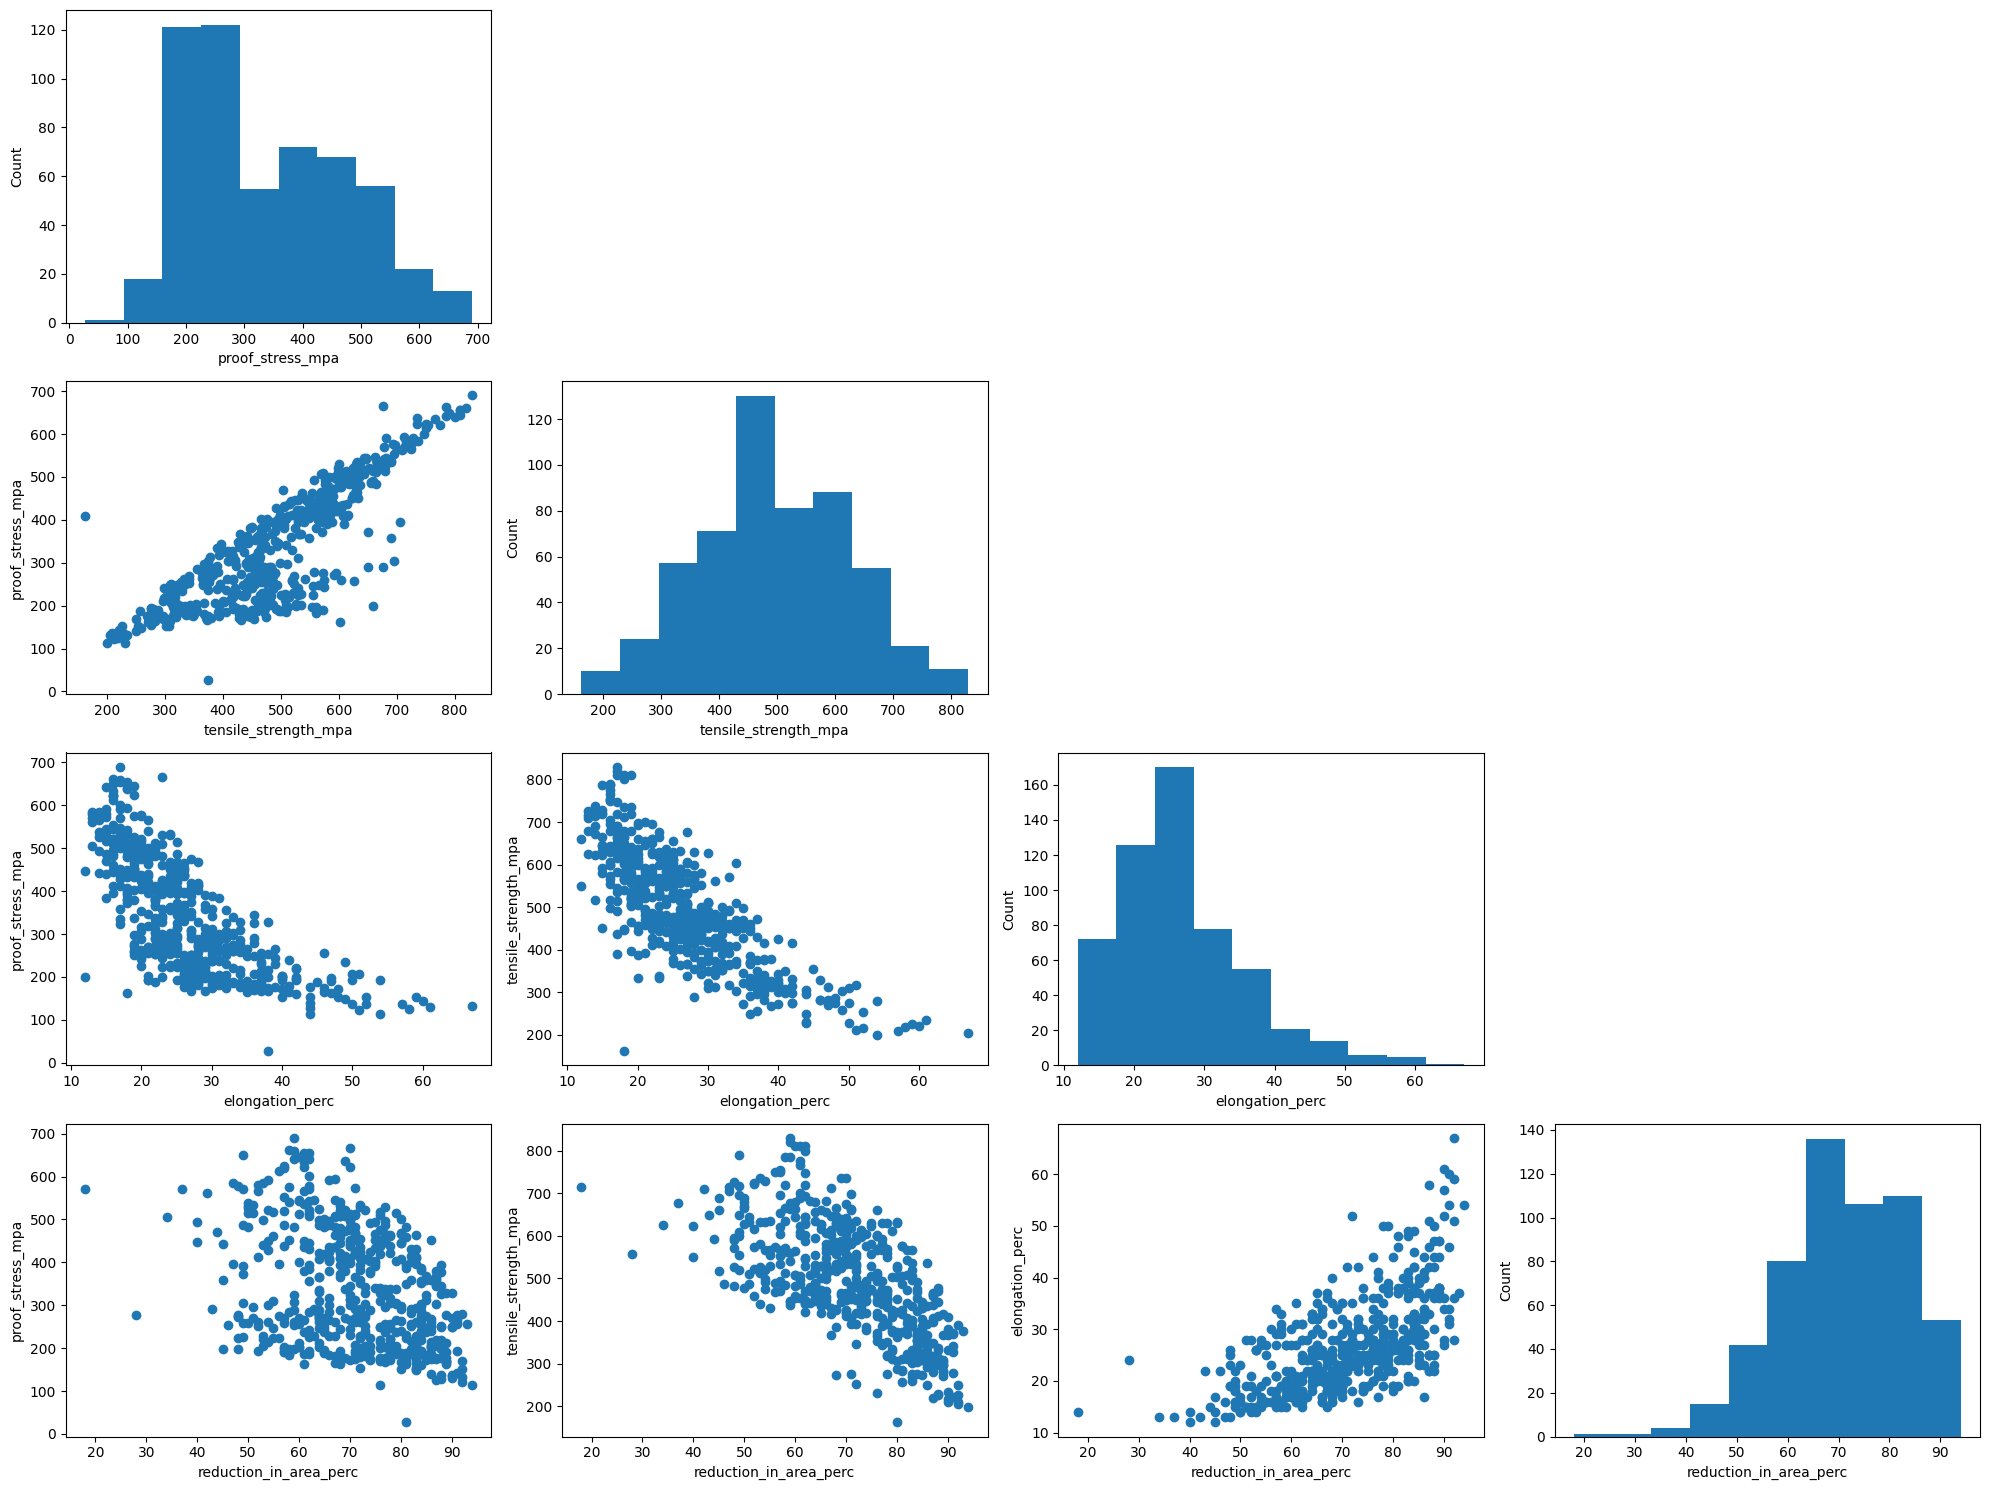

In [24]:
cols = ['proof_stress_mpa', 'tensile_strength_mpa', 'elongation_perc', 'reduction_in_area_perc']
scatterplotmatrix(dy_train[cols].values, figsize=(20, 15), names=cols, alpha=1)
plt.tight_layout()
plt.show()

We see that distributions of our target variables are quite similar to normal (elongation and reduction_in_area just have tails).

There is also linear dependency between tensile strength and proof stress. Dependency between elongation and proof_stress, so as between elongation and tensile_strength may be approximated with hiperbole or polinimial expression. Proff_stress and reduction_in area have polinomial dependency.

## 2.5. Feature importance analysis

As all features and targets in our dataframe are numerical, we will explore correlation of variables

In [25]:
df_train_corr = df.corr()
df_train_corr

,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti,temperature_celcius,proof_stress_mpa,tensile_strength_mpa,elongation_perc,reduction_in_area_perc
c,1.000000,-0.406436,0.031060,0.057362,0.012374,0.285822,0.018132,0.255229,0.370810,0.386180,-0.263424,0.035562,0.131790,-0.025498,0.198514,0.231118,-0.148890,-0.279092
si,-0.406436,1.000000,0.223999,0.137729,-0.076419,-0.078942,0.116524,-0.028264,-0.105494,0.197927,0.389770,-0.123106,-0.155246,0.037223,0.268330,0.089367,-0.122950,0.165579
mn,0.031060,0.223999,1.000000,0.244273,-0.045453,0.454138,-0.474146,-0.405245,0.104404,0.008926,0.694523,-0.236816,0.193307,-0.023002,0.400552,0.244372,-0.124240,0.102368
p,0.057362,0.137729,0.244273,1.000000,0.179056,-0.143813,-0.139764,-0.387885,-0.023157,-0.083414,0.253370,-0.256030,0.283390,-0.029483,-0.043561,-0.008113,0.128672,0.040132
s,0.012374,-0.076419,-0.045453,0.179056,1.000000,0.067033,0.003919,-0.057536,0.085593,0.044347,0.141708,-0.171982,-0.023263,-0.003463,0.018728,0.008561,-0.039977,-0.122928
ni,0.285822,-0.078942,0.454138,-0.143813,0.067033,1.000000,0.126509,0.333242,0.578499,0.342878,0.163754,0.132118,-0.102792,0.035261,0.475950,0.282226,-0.292716,-0.020420
cr,0.018132,0.116524,-0.474146,-0.139764,0.003919,0.126509,1.000000,0.794756,0.198392,0.630935,-0.396891,0.454343,-0.131306,0.092847,0.253236,0.157497,-0.301270,-0.049078
mo,0.255229,-0.028264,-0.405245,-0.387885,-0.057536,0.333242,0.794756,1.000000,0.295700,0.722246,-0.486066,0.348500,-0.169535,0.086746,0.359735,0.249959,-0.410182,-0.169626
cu,0.370810,-0.105494,0.104404,-0.023157,0.085593,0.578499,0.198392,0.295700,1.000000,0.294166,-0.263322,0.201335,-0.185620,0.024965,0.199562,0.088668,-0.177636,-0.177663
v,0.386180,0.197927,0.008926,-0.083414,0.044347,0.342878,0.630935,0.722246,0.294166,1.000000,-0.124082,0.232446,-0.086517,0.067705,0.635526,0.440069,-0.499233,-0.203168


<AxesSubplot: >

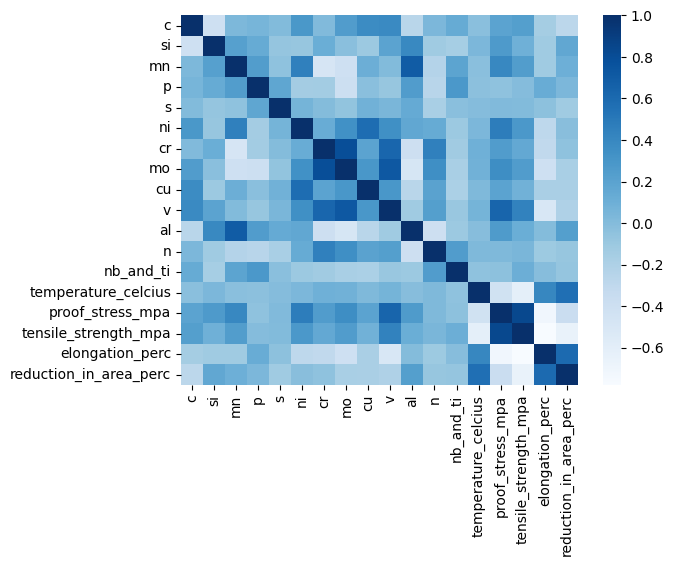

In [26]:
sb.heatmap(df_train_corr, cmap="Blues")

From the heatmap above we see that there is strong correlation between some target variables: elongation and reduction_in_area, proof_stress and elongation. These results are rather expectable.

But there are more specific questions, that are concernes with the task of our project:

-- is there any correlation between elements?

-- how elements affect target variables?

Let's consider the first question

In [27]:
list_elem = list_features
list_elem.remove('temperature_celcius')
df_train_feature_corr = df[list_features].corr()
df_train_feature_corr

,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti
c,1.000000,-0.406436,0.031060,0.057362,0.012374,0.285822,0.018132,0.255229,0.370810,0.386180,-0.263424,0.035562,0.131790
si,-0.406436,1.000000,0.223999,0.137729,-0.076419,-0.078942,0.116524,-0.028264,-0.105494,0.197927,0.389770,-0.123106,-0.155246
mn,0.031060,0.223999,1.000000,0.244273,-0.045453,0.454138,-0.474146,-0.405245,0.104404,0.008926,0.694523,-0.236816,0.193307
p,0.057362,0.137729,0.244273,1.000000,0.179056,-0.143813,-0.139764,-0.387885,-0.023157,-0.083414,0.253370,-0.256030,0.283390
s,0.012374,-0.076419,-0.045453,0.179056,1.000000,0.067033,0.003919,-0.057536,0.085593,0.044347,0.141708,-0.171982,-0.023263
ni,0.285822,-0.078942,0.454138,-0.143813,0.067033,1.000000,0.126509,0.333242,0.578499,0.342878,0.163754,0.132118,-0.102792
cr,0.018132,0.116524,-0.474146,-0.139764,0.003919,0.126509,1.000000,0.794756,0.198392,0.630935,-0.396891,0.454343,-0.131306
mo,0.255229,-0.028264,-0.405245,-0.387885,-0.057536,0.333242,0.794756,1.000000,0.295700,0.722246,-0.486066,0.348500,-0.169535
cu,0.370810,-0.105494,0.104404,-0.023157,0.085593,0.578499,0.198392,0.295700,1.000000,0.294166,-0.263322,0.201335,-0.185620
v,0.386180,0.197927,0.008926,-0.083414,0.044347,0.342878,0.630935,0.722246,0.294166,1.000000,-0.124082,0.232446,-0.086517


<AxesSubplot: >

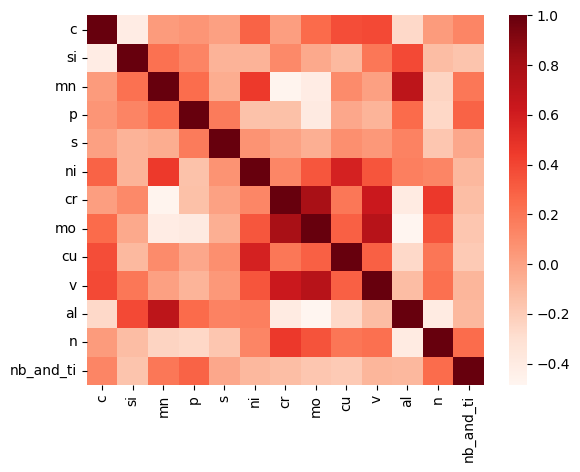

In [28]:
sb.heatmap(df_train_feature_corr, cmap="Reds")

We see that there are certain correspondence in between quantity of some elements in low-alloyed steels: Mo and Cr (0.795), Mo and V (0.723), Al and Mn (0.694). The correspondence is straight, i.e. if an amount of one elemet is low/high, then there is little/more the other element.

Now lets check, if there is correlation between percentage of some certain elements and mechanical properties of steels

In [29]:
for t in list_targets:
    print("Correlation with {}".format(t))
    cor = df_train_with_target[list_elem].corrwith(df_train_with_target[t]).abs().sort_values(ascending=False)
    print(cor)

Correlation with proof_stress_mpa
v            0.621106
ni           0.436433
mn           0.413787
mo           0.333534
al           0.270158
si           0.242318
cr           0.231208
c            0.216359
cu           0.191851
nb_and_ti    0.046568
n            0.022744
p            0.020320
s            0.003741
dtype: float64
Correlation with tensile_strength_mpa
v            0.443576
mn           0.261378
ni           0.253919
c            0.239302
mo           0.236378
cr           0.153294
al           0.133525
cu           0.102660
nb_and_ti    0.090847
si           0.069522
n            0.026273
s            0.012634
p            0.006736
dtype: float64
Correlation with elongation_perc
v            0.510751
mo           0.414545
cr           0.307533
ni           0.287662
cu           0.191569
c            0.161018
mn           0.139405
p            0.133308
n            0.114336
si           0.103603
s            0.028617
al           0.011345
nb_and_ti    0.005633
dtype: 

Results obtained show that there is no direct correspondence between presence of certain chemical elements and tensile stress of a low-aloy steel or its reduction in area. This doesn't mean that these elements don't affect mechanical properties of a steel. But this means that correspondence in between structure composition of a steel and it's mechanical properties is more complicated than just a straingt dependency from certain element. More ower, it can be expected that, **mechanical properties of a steel are affected by combination of elements**. That is why methods of machine learning may be more effective in mechanical properties prediction task then other mathematical analusis methods.

The results obtained also show that presence of vanadium affects proof_stress and elongation more than presence of other elements.

# 3. Model creation

Most regression problems are threated on the base of single-target approach, i.e. when trere is only one target variable. Not all ML algorithms support multi-target approach. Possible solution is to use **MultiOutputRegressor** class. By means of this tool you can apply any regression algorithm to multi-target regression problem. But in this project we will use those algorithms, which support multi-target approach:

- linear regression
- decision tree
- random forest

## 3.1. Linear regression

In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

### 3.1.1 General approach

In [65]:
model = Ridge()

# fit model
model.fit(df_train, dy_train)

Ridge()

In [66]:
y_pred = model.predict(df_val)

Now we need to evaluate quality of our model. Let's take a look at first 5 elements of our prediction and validation data

In [67]:
y_pred[:5]

array([[472.33683478, 601.78677707,  17.45571663,  62.22051779],
       [355.91465122, 468.47882488,  29.27611912,  79.98301214],
       [175.41120866, 367.40624916,  36.20603086,  74.85412602],
       [215.26031837, 428.0416748 ,  33.71413701,  69.57342816],
       [519.72380067, 672.60606545,  17.13520273,  61.51517874]])

In [68]:
dy_val.to_numpy()[:5]

array([[561, 674,  18,  60],
       [361, 452,  27,  85],
       [176, 373,  37,  75],
       [231, 506,  34,  67],
       [425, 580,  26,  71]], dtype=int64)

We see that ranges of target variables quite different. In this case metrics like MSE may be not efficient. It's so, because error of value 10, for example, may be not so sencible for proof_stress variable, but it is very valuable for elongation.

That is why we need relative metric to estimate error for every target variable. We'll use MAPE (Mean absolute percentage error) metrics for this purpose. It is calculated as 

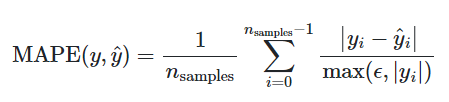

Then we'll calculate total error estimation as mean of MAPE for all target variables.

In [69]:
y_val = dy_val.to_numpy()

In [70]:
mape = {}

for i in range(4):
    mape[list_targets[i]] = mean_absolute_percentage_error(y_val[:, i], y_pred[:, i])

mape

{'proof_stress_mpa': 0.15458828619543627,
 'tensile_strength_mpa': 0.13521007615587932,
 'elongation_perc': 0.1710534690081321,
 'reduction_in_area_perc': 0.13436957333718325}

In [71]:
mean_mape = sum(list(mape.values())) / 4
mean_mape

0.14880535117415775

### 3.1.2. Parameter tuning

We'll tune alpha - parameter, that multiplies the L2 term, controlling regularization strength.

In [73]:
alpha = [0, 1, 5, 10, 15, 20, 50]
mean_mape_score = []

for a in alpha:
    model = Ridge(alpha=a)
    model.fit(df_train, dy_train)
    y_pred = model.predict(df_val)
    mape = {}
    for i in range(4):
        mape[list_targets[i]] = mean_absolute_percentage_error(y_val[:, i], y_pred[:, i])
    mean_mape = sum(list(mape.values())) / 4
    print('%4s     %.3f' % (a, mean_mape))

   0     0.145
   1     0.149
   5     0.153
  10     0.157
  15     0.161
  20     0.164
  50     0.179


So we see, that there is minimum value of mean_mape estination for alpha=0. But in scikit-learn documentation there is a note, that "**for numerical reasons, using alpha = 0 with the Ridge object is not advised. Instead, you should use the LinearRegression object**". That is why our final linear regression model will be the next

In [77]:
model = LinearRegression()
model.fit(df_train, dy_train)
y_pred = model.predict(df_val)
mape = {}
for i in range(4):
    mape[list_targets[i]] = mean_absolute_percentage_error(y_val[:, i], y_pred[:, i])
mean_mape = sum(list(mape.values())) / 4
print('Mean MAPE for linear regression model = %.3f' % (mean_mape))

Mean MAPE for linear regression model = 0.145
